# Preparation pour le modèle de prédiction

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [62]:
df = pd.read_csv('data/kc_house_data_clean.csv')

/tmp/ipykernel_23223/2329454336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=100, kde=False)


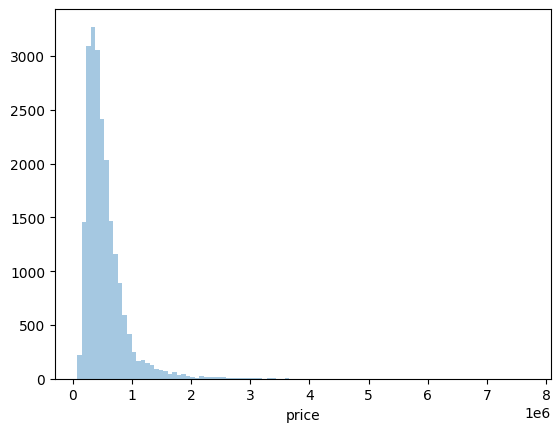

In [63]:
sns.distplot(df['price'], bins=100, kde=False)
plt.show()

# 1. On enlève les colonnes inutiles

In [64]:
# convertir la colonne zipcode en colonnes binaires
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip')

# ajouter les colonnes binaires au dataframe
df = pd.concat([df, zip_dummies], axis=1)
df_knn = df

                ratio_bed_bath    price
ratio_bed_bath         1.00000 -0.25314
price                 -0.25314  1.00000
           bedrooms  bathrooms
bedrooms   1.000000   0.514984
bathrooms  0.514984   1.000000


<AxesSubplot: xlabel='bedrooms', ylabel='bathrooms'>

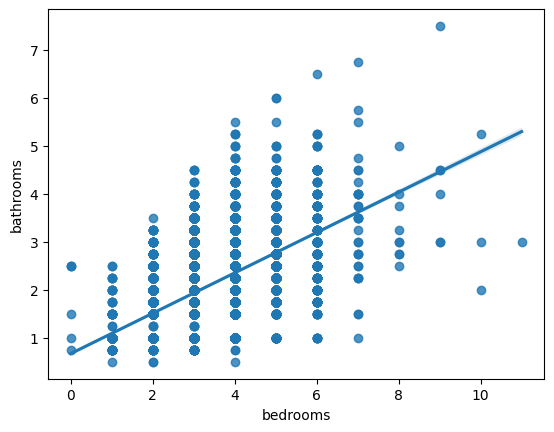

In [65]:
df_drop = df.drop(['date', 'id', 'zipcode' , 'lat' , 'long' , 'yr_built' , 'yr_renovated' ], axis=1)
# supprimer les valeurs aberrantes
df_drop = df_drop[df_drop['surface'] <= 8000]
df_drop = df_drop[df_drop['price'] <= 1500000]
# Ratio chambres/salle de bain
df_drop['ratio_bed_bath'] = df_drop['bedrooms'] / df_drop['bathrooms']


print(df_drop[['ratio_bed_bath', 'price']].corr())

# correration entre la salle de bain et les chambres
print(df_drop[['bedrooms', 'bathrooms']].corr())
# graphique
sns.regplot(x='bedrooms', y='bathrooms', data=df_drop)

In [66]:
corr_matrix = df.corr()
pd.set_option('display.max_rows', 200)
print(corr_matrix['price'].sort_values(ascending=False))

/tmp/ipykernel_23223/1920133700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price            1.000000
surface          0.701925
grade            0.667849
sqft_above       0.605395
sqft_living15    0.585235
bathrooms        0.525895
view             0.397350
sqft_basement    0.323859
bedrooms         0.316068
lat              0.306810
zip_98004        0.271196
waterfront       0.266436
floors           0.256635
zip_98039        0.212613
zip_98040        0.204920
zip_98112        0.169879
zip_98006        0.133718
yr_renovated     0.126449
zip_98033        0.102570
zip_98105        0.090989
sqft_lot         0.089701
zip_98075        0.088688
zip_98199        0.083671
sqft_lot15       0.082494
zip_98119        0.078097
zip_98102        0.068068
zip_98109        0.065858
zip_98005        0.065123
zip_98074        0.057208
yr_built         0.053861
zip_98053        0.051449
zip_98052        0.047303
zip_98177        0.040508
zip_98077        0.037373
zip_98115        0.036191
condition        0.036176
zip_98008        0.033073
zip_98122        0.029943
zip_98027   

In [67]:
df

,id,date,price,bedrooms,bathrooms,surface,sqft_lot,floors,waterfront,view,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21598,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21599,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21600,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_drop

,price,bedrooms,bathrooms,surface,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,ratio_bed_bath
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,1,0,0,0,3.000000
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,1.333333
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,2.000000
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,1.333333
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,1.200000
21598,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,1.600000
21599,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,2.666667
21600,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,1.200000


                price_per_sqft    price
price_per_sqft         1.00000  0.49738
price                  0.49738  1.00000


<AxesSubplot: xlabel='price_per_sqft', ylabel='price'>

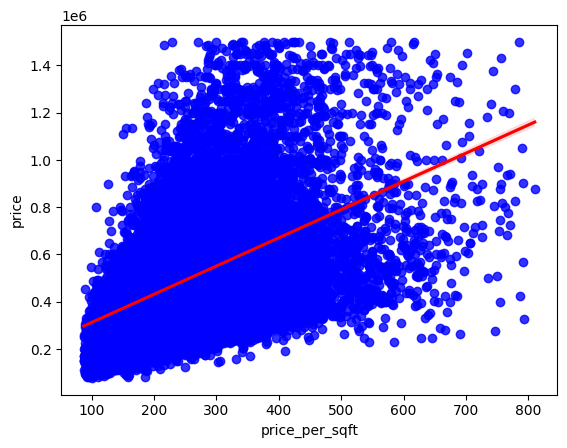

In [69]:
# KNN
df_knn = df.drop(['date', 'id', 'zipcode' , 'lat' , 'long' , 'yr_built' , 'yr_renovated'], axis=1)
df_knn = df_knn[df_knn['price'] <= 1500000] 
# prix aux pieds carrés
df_knn['price_per_sqft'] = df_knn['price'] / df_knn['surface']
# correlation entre le prix et les pieds carrés
print(df_knn[['price_per_sqft', 'price']].corr())
# graphique couleur ligne de regression en rouge et les poins en bleu
sns.regplot(x='price_per_sqft', y='price', data=df_knn, color='blue', line_kws={'color': 'red'})

In [70]:
df_drop.to_csv('data/kc_house_data_clean_model.csv', index=False)
df_knn.to_csv('data/kc_house_data_clean_knn.csv', index=False)